# Darts POC

In [23]:
import darts
import pandas as pd
import datetime
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from darts import TimeSeries
from darts.datasets import AirPassengersDataset

In [12]:
data = pd.read_csv("data/us48.csv")

data["time"] = pd.to_datetime(data["period"])

In [13]:
data.head()

period respondent         respondent-name type type-name  \
0  2015-07-01 05:00:00       US48  United States Lower 48    D    Demand   
1  2015-07-01 06:00:00       US48  United States Lower 48    D    Demand   
2  2015-07-01 07:00:00       US48  United States Lower 48    D    Demand   
3  2015-07-01 08:00:00       US48  United States Lower 48    D    Demand   
4  2015-07-01 09:00:00       US48  United States Lower 48    D    Demand   

    value    value-units                time  
0  162827  megawatthours 2015-07-01 05:00:00  
1  335153  megawatthours 2015-07-01 06:00:00  
2  333837  megawatthours 2015-07-01 07:00:00  
3  398386  megawatthours 2015-07-01 08:00:00  
4  388954  megawatthours 2015-07-01 09:00:00

In [30]:
data[data["respondent"] == "US48"][["time", "value"]]

time   value
0     2015-07-01 05:00:00  162827
1     2015-07-01 06:00:00  335153
2     2015-07-01 07:00:00  333837
3     2015-07-01 08:00:00  398386
4     2015-07-01 09:00:00  388954
...                   ...     ...
74963 2024-01-18 16:00:00  577152
74964 2024-01-18 17:00:00  562363
74965 2024-01-18 18:00:00  548884
74966 2024-01-18 19:00:00  537588
74967 2024-01-18 20:00:00  523602

[74968 rows x 2 columns]

In [31]:


d = data[data["respondent"] == "US48"][["time", "value"]].sort_values(by = ["time"])

d.head()

time   value
0 2015-07-01 05:00:00  162827
1 2015-07-01 06:00:00  335153
2 2015-07-01 07:00:00  333837
3 2015-07-01 08:00:00  398386
4 2015-07-01 09:00:00  388954

In [37]:
p = go.Figure()
p.add_trace(go.Scatter(x = d["time"], y = d["value"],
                       mode='lines',
                    name='data',
                    line=dict(color='royalblue', width=2)))
p.show()

<Axes: xlabel='time'>

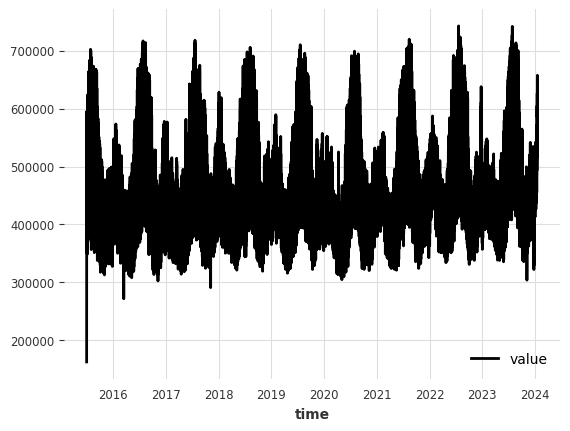

In [36]:
ts = TimeSeries.from_dataframe(d, time_col= "time", value_cols= "value")

ts.plot()